In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df = pd.read_csv('medical_examination.csv')
print(df.head())

   id    age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0   0  18393       2     168    62.0    110     80            1     1      0   
1   1  20228       1     156    85.0    140     90            3     1      0   
2   2  18857       1     165    64.0    130     70            3     1      0   
3   3  17623       2     169    82.0    150    100            1     1      0   
4   4  17474       1     156    56.0    100     60            1     1      0   

   alco  active  cardio  
0     0       1       0  
1     0       1       1  
2     0       0       1  
3     0       1       1  
4     0       0       0  


In [41]:
bmi = df['weight'] / ((df['height'] *100) ** 2)
df['overweight'] = (bmi>25).astype(int)

print(df['overweight'])

0        0
1        0
2        0
3        0
4        0
        ..
69995    0
69996    0
69997    0
69998    0
69999    0
Name: overweight, Length: 70000, dtype: int32


In [25]:
df['cholesterol'] = (df['cholesterol'] > 1).astype(int)
df['gluc'] = (df['gluc'] > 1).astype(int)
print(df['cholesterol'])

0        0
1        1
2        1
3        0
4        0
        ..
69995    0
69996    1
69997    1
69998    0
69999    1
Name: cholesterol, Length: 70000, dtype: int32


In [27]:
df['gluc']

0        0
1        0
2        0
3        0
4        0
        ..
69995    0
69996    1
69997    0
69998    1
69999    0
Name: gluc, Length: 70000, dtype: int32

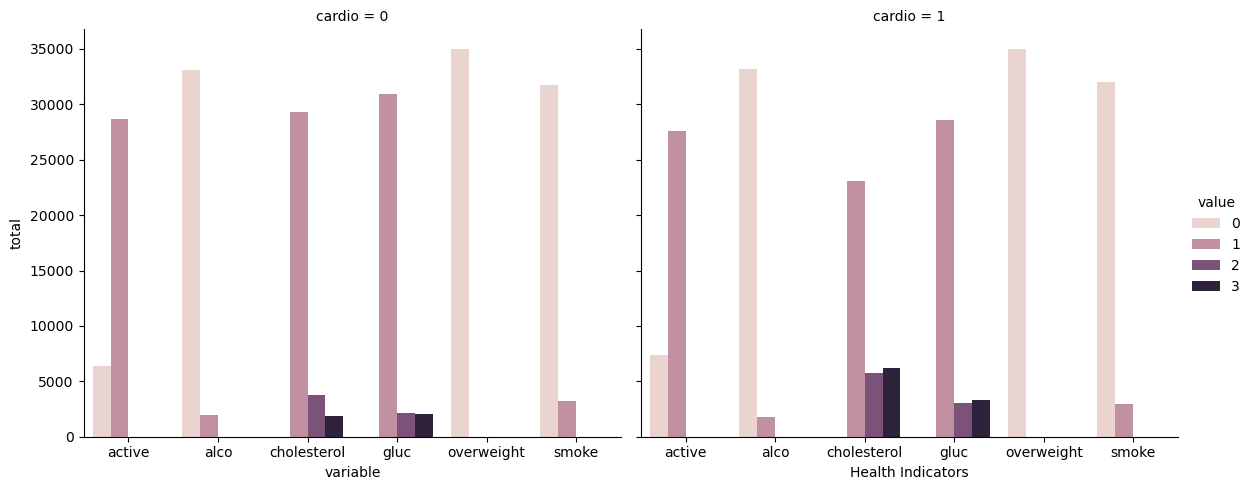

In [71]:
def draw_cat_plot():
    df_cat = pd.melt(df, id_vars=['cardio'], value_vars=['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'overweight'])

    df_cat = df_cat.groupby(["cardio", "variable", "value"]).size().reset_index(name="total")
    
    fig = sns.catplot(x="variable", y="total", hue="value", col="cardio", 
                      data=df_cat, kind="bar", height=5, aspect=1.2)

    plt.ylabel("Count")
    plt.xlabel("Health Indicators")

    return fig

draw_cat_plot()
plt.show()

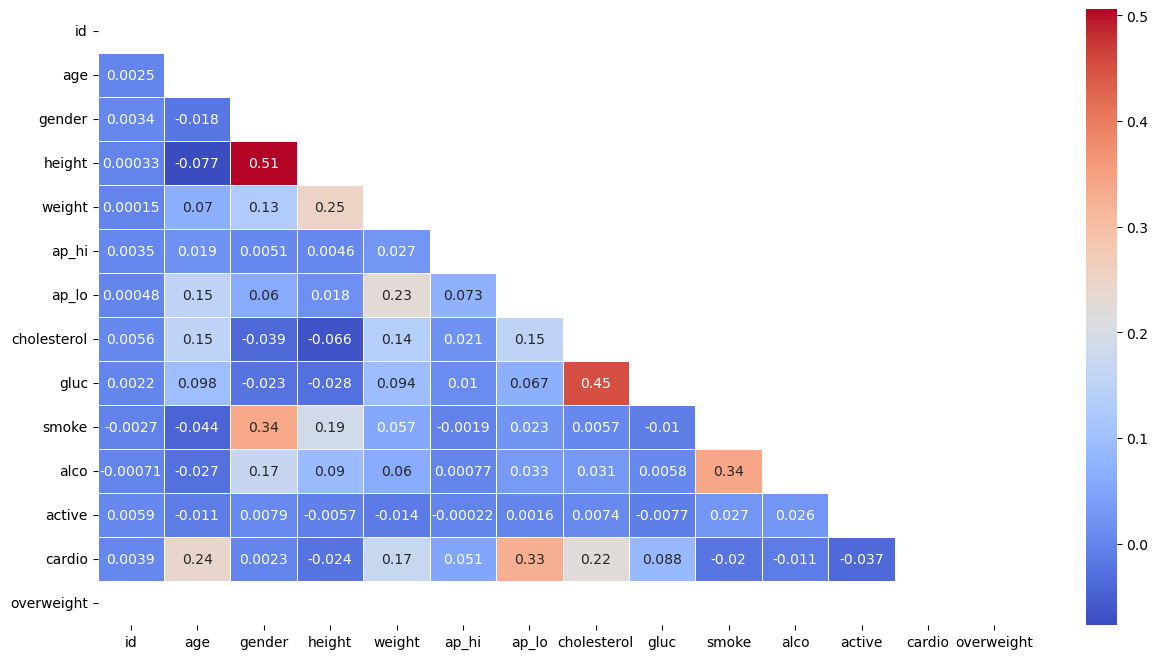

In [75]:
def draw_heat_map():
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) & 
                 (df['height'] >= df['height'].quantile(0.025)) & 
                 (df['height'] <= df['height'].quantile(0.975)) & 
                 (df['weight'] >= df['weight'].quantile(0.025)) & 
                 (df['weight'] <= df['weight'].quantile(0.975))]

    corr = df_heat.corr()

    mask = np.triu(np.ones_like(corr, dtype=bool))
    
    fig, ax = plt.subplots(figsize=(15, 8))
    
    sns.heatmap(corr, annot=True, cmap='coolwarm', linewidth='0.5', mask=mask, ax=ax)

    return fig

draw_heat_map()
plt.show()